In [64]:
import pandas as pd

In [65]:
# Data Ingestion Step
df = pd.read_csv('/config/workspace/notebooks/test.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [66]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

No missing value present in the data

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129050 entries, 0 to 129049
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       129050 non-null  int64  
 1   carat    129050 non-null  float64
 2   cut      129050 non-null  object 
 3   color    129050 non-null  object 
 4   clarity  129050 non-null  object 
 5   depth    129050 non-null  float64
 6   table    129050 non-null  float64
 7   x        129050 non-null  float64
 8   y        129050 non-null  float64
 9   z        129050 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.8+ MB


Id column is useless therefore i drop Id column

In [68]:
df = df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


Check for Duplicated record

In [69]:
df.duplicated().sum()

535

REMOVE DUPLICATED RECORD

In [70]:
df.drop_duplicates(keep=False, inplace=True)

In [71]:
df.duplicated().sum()

0

segregrate numerical anad categorical columns

In [72]:
numerical_columns = df.columns[df.dtypes!='object']

In [73]:
categorical_columns = df.columns[df.dtypes=='object']

In [74]:
print("Numerical columns",numerical_columns)
print("Categorical Columns",categorical_columns)

Numerical columns Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Categorical Columns Index(['cut', 'color', 'clarity'], dtype='object')


In [75]:
df[categorical_columns].describe()

,cut,color,clarity
count,127997,127997,127997
unique,5,7,8
top,Ideal,G,SI1
freq,60318,29262,35116


In [76]:
df['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Fair', 'Good'], dtype=object)

In [77]:
df['cut'].nunique()

5

In [78]:
df['cut'].value_counts()

cut
Ideal        60318
Premium      33424
Very Good    25406
Good          7542
Fair          1307
Name: count, dtype: int64

if 5 categories are there then i simply use one hot coding 

In [79]:
df['color'].describe()

count     127997
unique         7
top            G
freq       29262
Name: color, dtype: object

In [80]:
df['color'].value_counts()

color
G    29262
E    23797
F    22608
H    20476
D    16001
I    11645
J     4208
Name: count, dtype: int64

In [81]:
df['clarity'].value_counts()

clarity
SI1     35116
VS2     31874
VS1     20342
SI2     20119
VVS2    10213
VVS1     7197
IF       2744
I1        392
Name: count, dtype: int64

In [82]:
!pip install seaborn

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#plt.subplot_adjust(top= 0)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

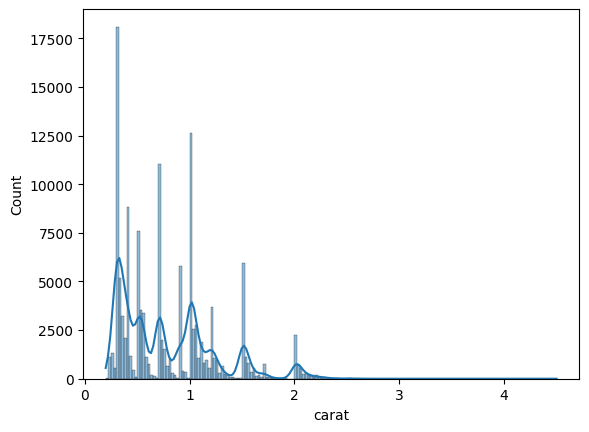

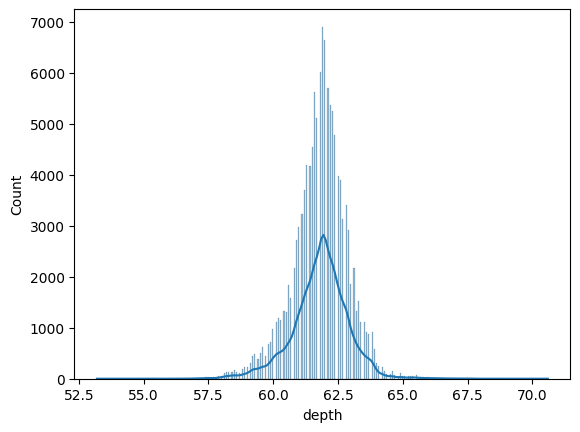

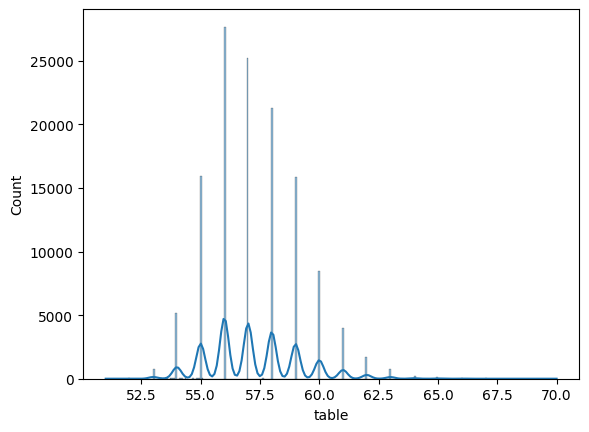

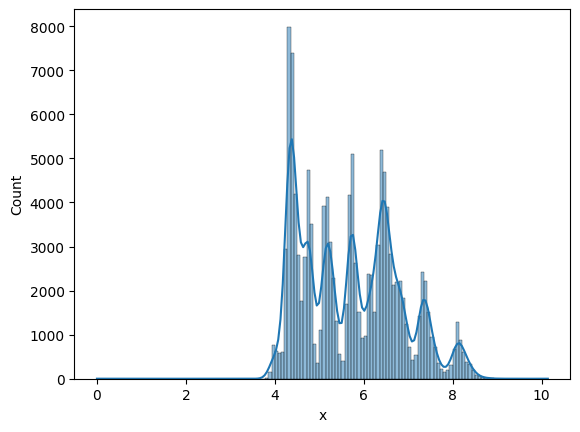

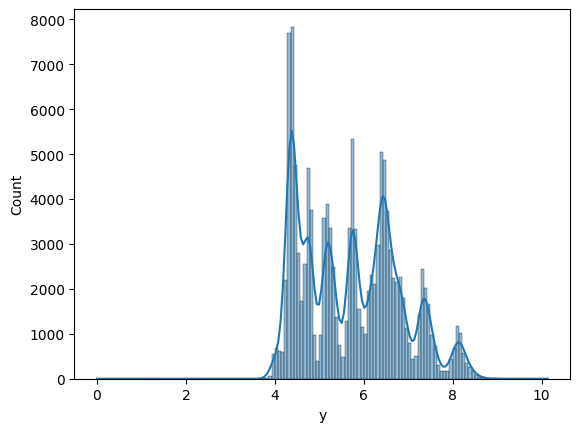

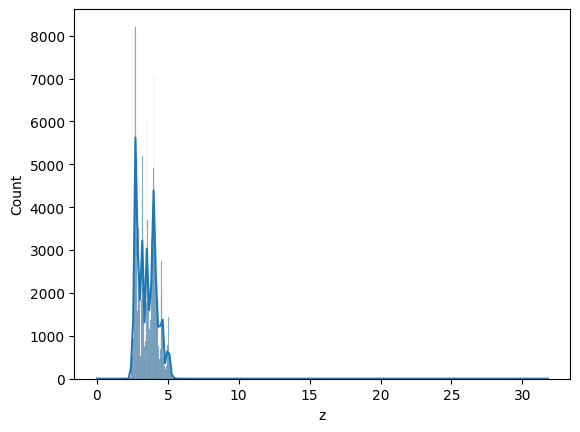

In [84]:
x=1
for i in numerical_columns:
    sns.histplot(data = df, x=i,kde=True )
    print('\n')
    plt.show()

/tmp/ipykernel_359/1189662037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i] )


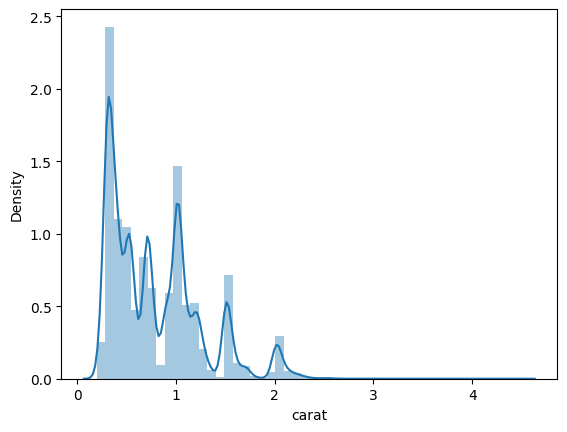

/tmp/ipykernel_359/1189662037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i] )


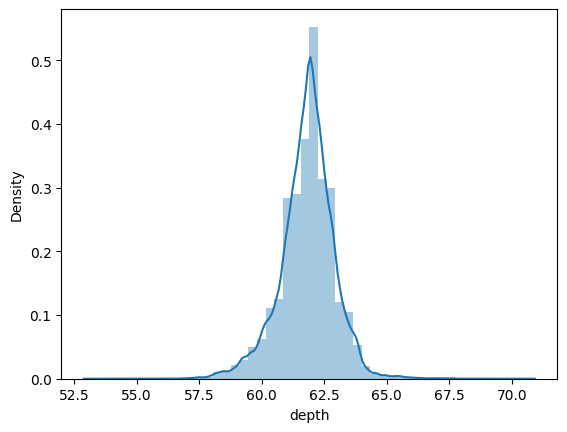

/tmp/ipykernel_359/1189662037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i] )


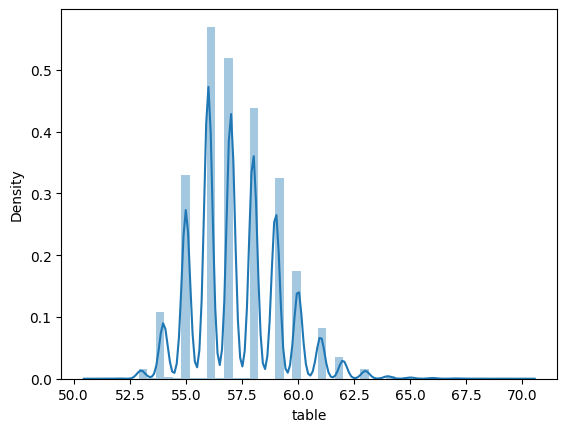

/tmp/ipykernel_359/1189662037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i] )


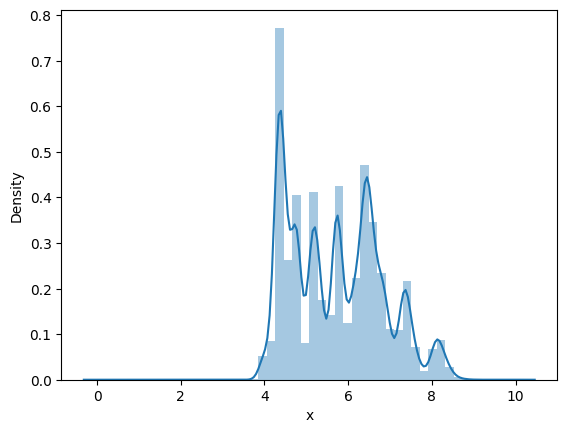

/tmp/ipykernel_359/1189662037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i] )


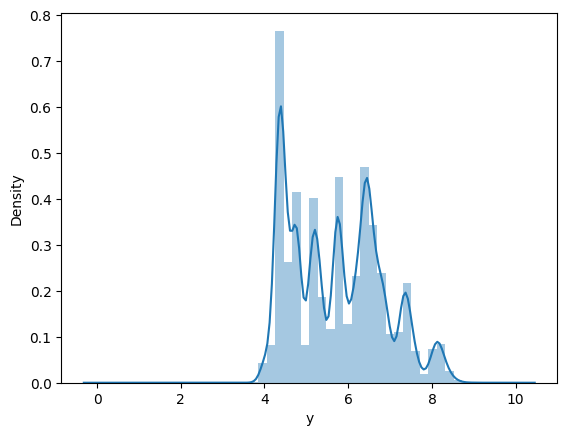

/tmp/ipykernel_359/1189662037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i] )


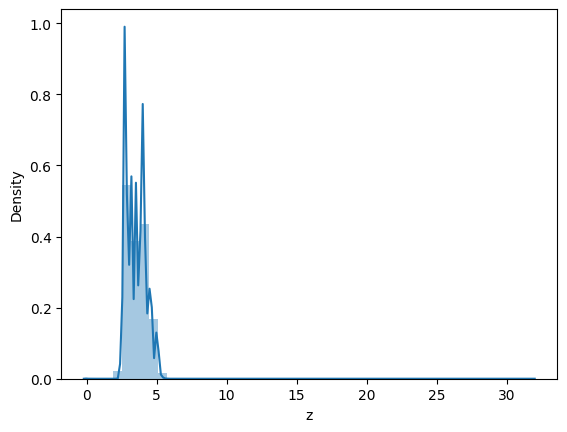

In [85]:
x=1
for i in numerical_columns:
    sns.distplot(df[i] )
    print('\n')
    plt.show()

In [86]:
x=1
for i in categorical_columns:
    sns.countplot(df[i])
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title('Bar Chart of Categorical Data')
    plt.xticks(rotation=45)
    plt.show()

ValueError: could not convert string to float: 'Ideal'

In [87]:
df[categorical_columns]

,cut,color,clarity
0,Ideal,D,VS2
1,Very Good,F,SI2
2,Ideal,I,VS2
3,Ideal,G,VVS2
4,Very Good,I,VS2
...,...,...,...
129045,Ideal,D,VVS2
129046,Premium,D,SI1
129047,Premium,G,VVS2
129048,Ideal,D,I1


In [88]:
for i in categorical_columns:
    print(f"Unique values in {i} column: {df[i].unique()}")


Unique values in cut column: ['Ideal' 'Very Good' 'Premium' 'Fair' 'Good']
Unique values in color column: ['D' 'F' 'I' 'G' 'E' 'H' 'J']
Unique values in clarity column: ['VS2' 'SI2' 'VVS2' 'VS1' 'SI1' 'VVS1' 'IF' 'I1']


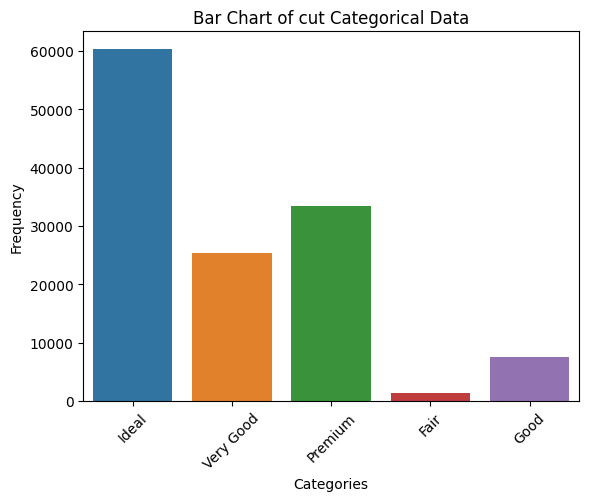

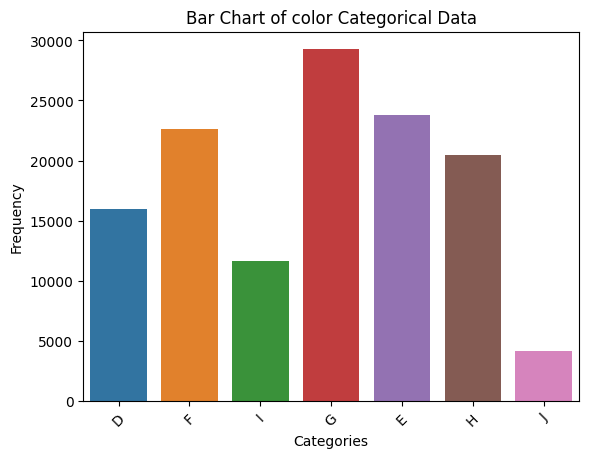

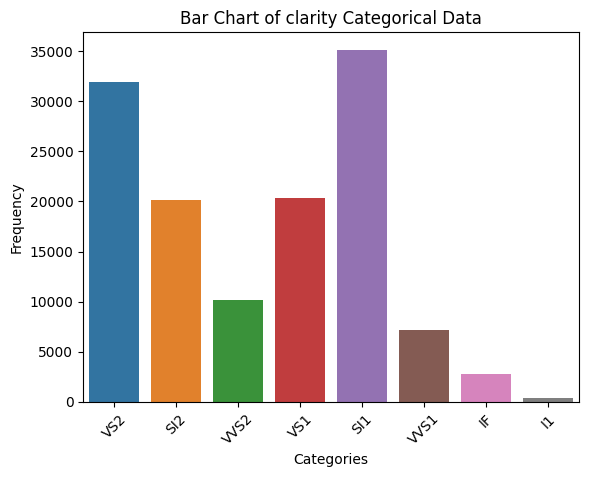

In [ ]:
for i in categorical_columns:
    plt.figure()  # Create a new figure for each plot
    sns.countplot(data=df, x=i)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of {i} Categorical Data')
    plt.xticks(rotation=45)
    plt.show()


correlation

<Axes: >

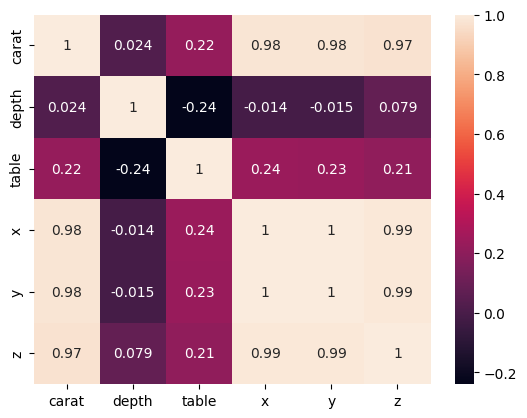

In [89]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

In [90]:
# currently we will not execute it
# df.drop(labels=['x','y','z'],axis=1)

/config/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


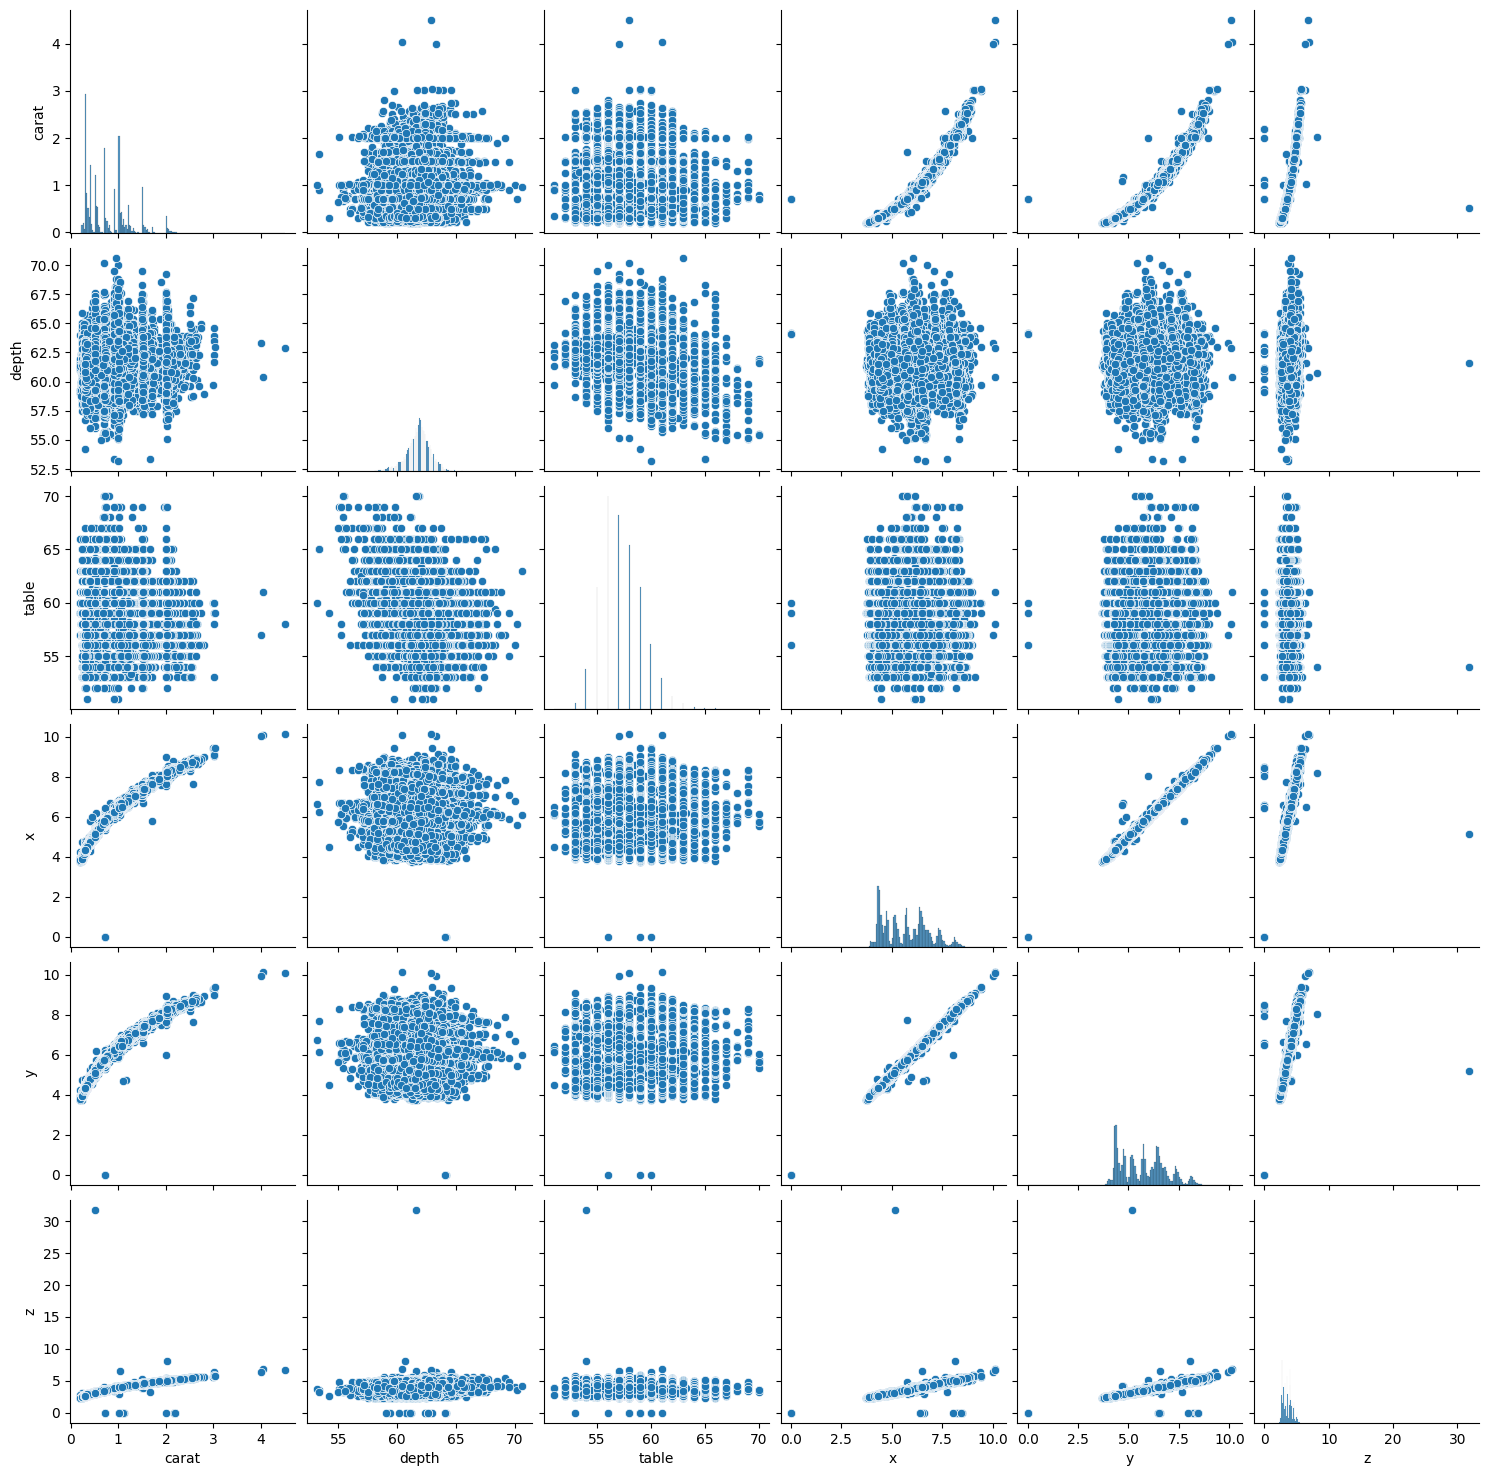

In [ ]:
sns.pairplot(df)

In [91]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


http://www.americangemsociety.org/ags-diamond-grading-system/


In [92]:
df['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Fair', 'Good'], dtype=object)

In [93]:
cut_map = {"Fair":1,"Good":12,"Very Good":3,"Premium":4,"Ideal":5}

In [94]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VVS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [95]:
clarity_map = {"I1":1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [96]:
df['color'].unique()

array(['D', 'F', 'I', 'G', 'E', 'H', 'J'], dtype=object)

In [97]:
color_mapper = {"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [98]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] =df['color'].map(color_mapper)

In [99]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.35,5,1,4,62.3,56.0,4.51,4.54,2.82
1,0.77,3,3,2,62.8,56.0,5.83,5.87,3.68
2,0.71,5,6,4,61.9,53.0,5.77,5.74,3.55
3,0.33,5,4,6,61.6,55.0,4.44,4.42,2.73
4,1.20,3,6,4,62.7,56.0,6.75,6.79,4.24
